In [1]:
from Dynamics import *
import pandas as pd

In [2]:
#params
C=0.1

In [3]:
adj,mean_patient, docIds = LoadMatData(22)

In [4]:
docs = doctors(len(docIds), mean_patient, C, ids = list(docIds))

In [5]:
failed = remove_doctors(docs.originalID, 1)
print(failed)

[2606]


In [6]:
totalpatients = docs.NumOfPatients[np.isin(docs.originalID,failed)].sum()

In [7]:
not_disconnected, lost, failed = docs.not_disconnected(adj, failed)

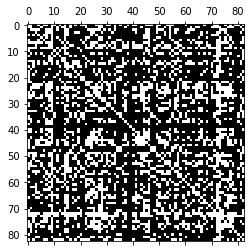

In [8]:
adj = adj[not_disconnected, :]
adj = adj[:,not_disconnected]
plt.spy(adj)

In [9]:
doc2sim, failed = docs.reindex(verbose=False, failed=failed)

In [10]:
patient = {}
patient["locations"] = np.hstack(np.array([i*np.ones(NPats) 
                                    for i, NPats in zip(failed,
                                                        docs.NumOfPatients[failed])])).astype(int).squeeze()
patient["status"] = np.ones(patient["locations"].shape, dtype=bool)
patient["displacements"] = np.zeros(patient["locations"].shape)

In [12]:
adj[:,failed] = 0
t = 1
print("Active Patients",patient["status"].sum())
while True:
    print(t)
    patient, docs, lost = step(patient, adj, docs, lost, verbose = False)
    t+=1
    print('Lost: ', lost)
    if not np.any(patient["status"]):
        break

Active Patients 994
1
Lost:  0
2
Lost:  0
3
Lost:  0
4
Lost:  0
5
Lost:  0
6
Lost:  0
7
Lost:  0
8
Lost:  0
9
Lost:  0
10
Lost:  0
11
Lost:  173


In [13]:
print(lost)
print(lost/totalpatients)

173
0.17404426559356137


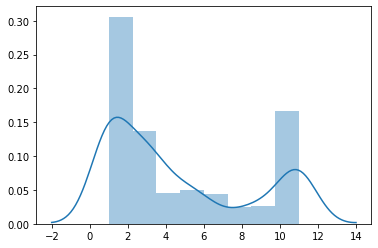

In [14]:
sns.distplot(patient["displacements"])

In [1]:
from NNSelfAvoiding import *

In [4]:
patient, docs, lost = NNselfAvoiding(10, predetermined=[1])

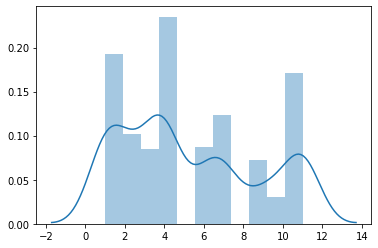

In [5]:
sns.distplot(patient["displacements"])

In [6]:
lost

172

In [ ]:
for doc in docs